# Machine Learning Project

# I. Introduction

Sequence classification is a type of predictive problem where we try to predict the category of a sequence of inputs over space or time. It is a hard task because the inputs can vary in length, the set of words (vocabulary) can be vary large and the model may want to understand the long-term context of a sequence.

## Description of the dataset

We will demonstrate sequence learning through a twitter sentiment analysis classification problem. Each tweet are short messages of varied length of words and the task is to build a classifier that can correctly predict the sentiment of each tweet.
Our dataset contains more than 1.2 million tweets, equally split in positive and negative messages. 

## Approach

We will approach this classification task by first getting an overlook of the dataset and the kind of messages we have at hand. Then we will apply some NLP techniques to transform our data into numerical objects (embedding) which we will feed into various Machine Learning Models. From Logistic Regressions to Deep Learning models, we will compare them and create a benchmark of various Supervised models for this classification task.

## Import

### Libraries and modules

In [2]:
import numpy as np
import pandas as pd
from Functions import GridSearch_, make_results

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.3)
sns.set(style="darkgrid")

# Machine Learning
## Tools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
## Models
from sklearn.naive_bayes import MultinomialNB

### Dataset

In [3]:
emote = pd.read_csv("data/MLUnige2021_train.csv",usecols=['emotion', 'user', 'text'])
emote_50 = emote[:50000]   #  50.000 first obs
emote_100 = emote[:100000] # 100.000 first obs
emote_320 = emote[:320000] #  about 1/4 of obs

results = pd.DataFrame()

## Multinomial Naive Bayes (MNB)

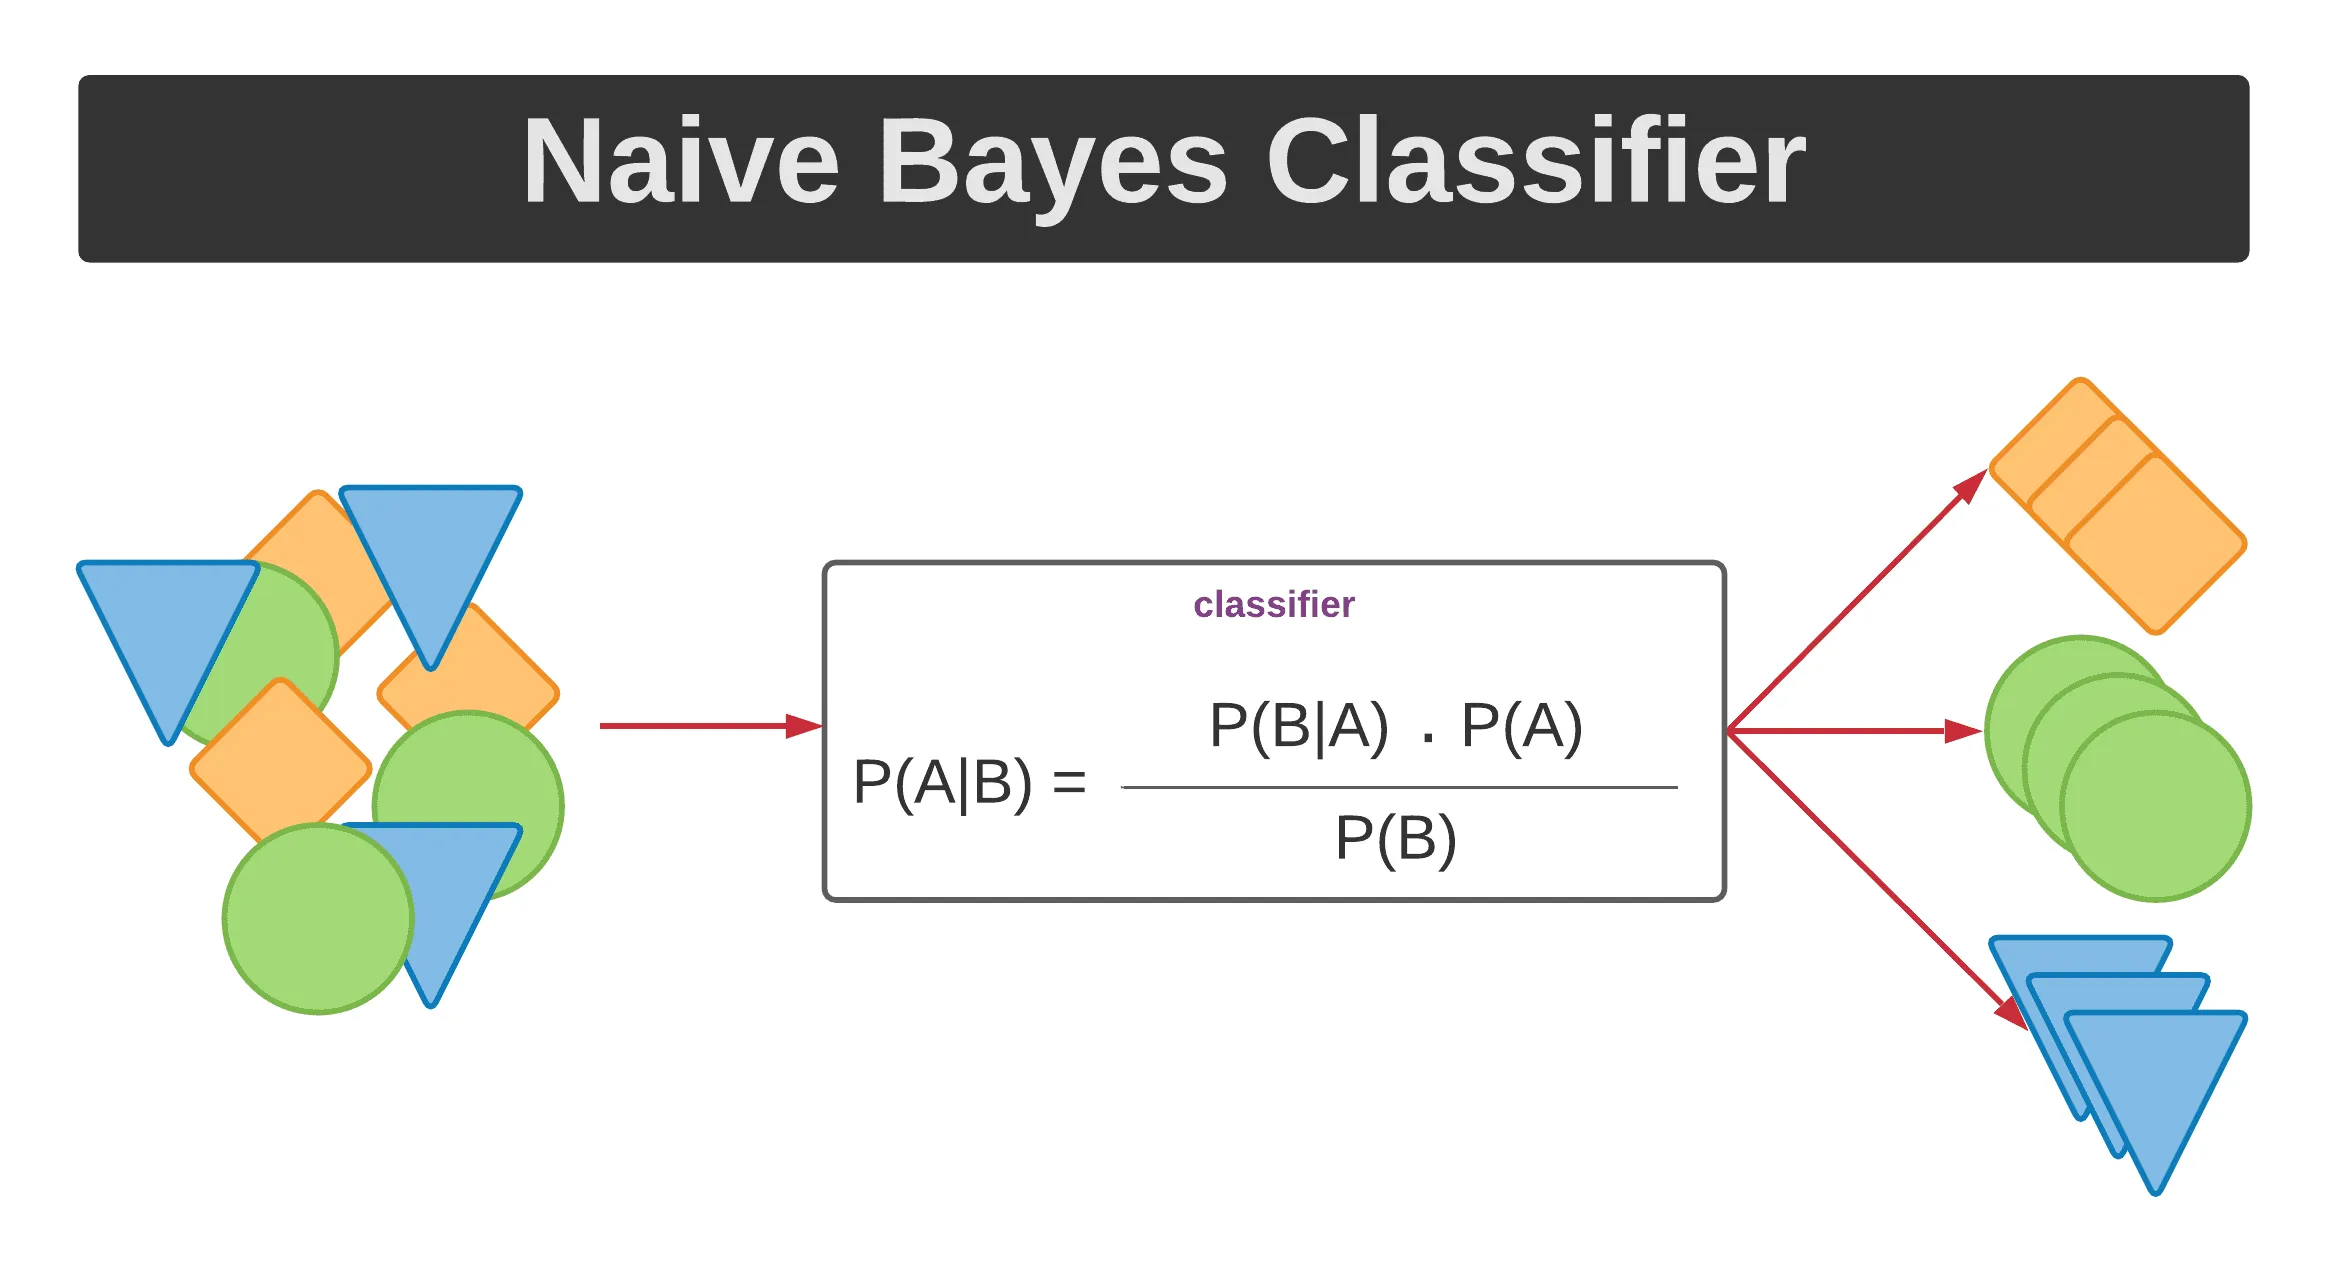

Multinomial Naive Bayes is a probabilistic classification algorithm that is based on Bayes' theorem. It is particularly suitable for classification tasks where the features are discrete and represent the frequency of occurrence of events.

Key Features:

**Discrete Features**: Multinomial Naive Bayes is designed for features that represent counts or frequencies, making it well-suited for text classification problems where each feature could be the frequency of a word in a document.

**Naive Assumption**: Like other Naive Bayes algorithms, it makes the "naive" assumption that the features are conditionally independent given the class label. While this assumption is often violated in real-world data, Naive Bayes models can still perform surprisingly well in practice.

**Probability Model**: It models the likelihood of observing a particular set of features given a class label, and it uses Bayes' theorem to compute the probability of a class given the observed features.

Use Cases:

Multinomial Naive Bayes is commonly used in natural language processing (NLP) tasks such as text classification, spam filtering, and sentiment analysis. It's particularly popular for handling text data due to its simplicity and efficiency.

Formula:

The probability of class Ck given the features x1,x2,...,xn is given by: P(Ck∣x1,x2,...,xn) = P(Ck)×P(x1∣Ck)×P(x2∣Ck)×…×P(xn∣Ck) / P(x1,x2,...,xn)

In practice, the denominator can be ignored since it's constant for all classes, and the class with the highest numerator is chosen as the predicted class.

Multinomial Naive Bayes has proven to be effective in many text classification scenarios, but its performance can be influenced by the quality of the feature representation and the independence assumptions.

Performing grid search...

Data length:  40000
Pipeline: CountVectorizer() TfidfTransformer() MultinomialNB()

Parameters:
{'model__alpha': (0.9, 1),
 'vect__max_df': (0.1, 0.2),
 'vect__ngram_range': ((1, 2), (1, 3))}

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Duration: 82.9s (n_jobs: 2)

Best score: 0.763
Best parameters set:
	model__alpha: 0.9
	vect__max_df: 0.1
	vect__ngram_range: (1, 2)


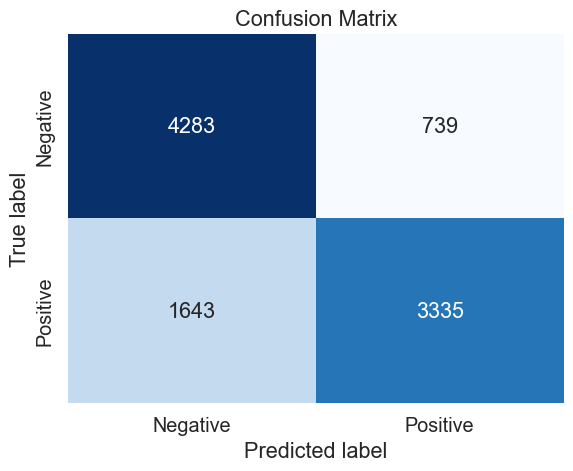

In [71]:
# Define the train and test sets (50 000 observations)
data = emote_50
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=37)

# Define the parameters to tune
parameters_mnb = {
    'vect__max_df': (.1,.2,),
    'vect__ngram_range': ((1, 2), (1, 3)),  
    'model__alpha': (.9,1,),
    #'model__penalty': ('l2','elasticnet'),
}

# Perform the grid search
gs = GridSearch_(X_train, 
                 y_train, 
                 n_jobs=2,
                 parameters = parameters_mnb, 
                 model = MultinomialNB())

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

mnb_50_cv_results = make_results('mnb', '50', gs, 'accuracy')
results = pd.concat([results, mnb_50_cv_results], axis=0)

Performing grid search...

Data length:  80000
Pipeline: CountVectorizer() TfidfTransformer() MultinomialNB()

Parameters:
{'model__alpha': (0.9, 1),
 'vect__max_df': (0.05, 0.1, 0.15),
 'vect__ngram_range': ((1, 2), (1, 3))}

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Duration: 241.9s (n_jobs: 2)

Best score: 0.778
Best parameters set:
	model__alpha: 0.9
	vect__max_df: 0.1
	vect__ngram_range: (1, 3)


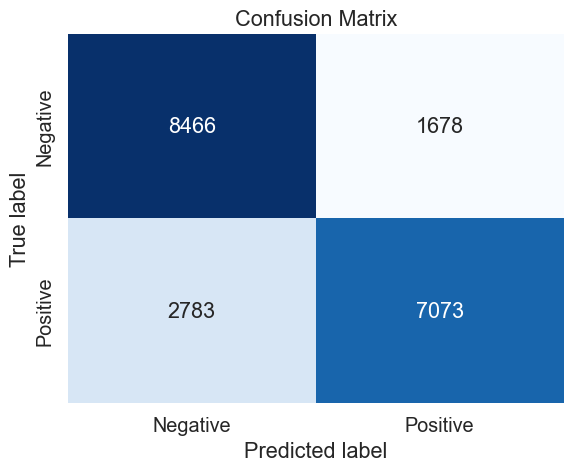

In [72]:
# Define the train and test sets (100 000 observations)
data = emote_100
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=37)

# Define the parameters to tune
parameters_mnb = {
    'vect__max_df': (.05,.1,.15,),
    'vect__ngram_range': ((1, 2), (1, 3)),  
    'model__alpha': (.9, 1,),
    #'model__penalty': ('l2','elasticnet'),
}

# Perform the grid search
gs = GridSearch_(X_train, 
                 y_train, 
                 n_jobs=2,
                 parameters = parameters_mnb, 
                 model = MultinomialNB())

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

mnb_100_cv_results = make_results('mnb', '100', gs, 'accuracy')
results = pd.concat([results, mnb_100_cv_results], axis=0)

Performing grid search...

Data length:  256000
Pipeline: CountVectorizer() TfidfTransformer() MultinomialNB()

Parameters:
{'model__alpha': (0.8, 0.9, 1),
 'vect__max_df': (0.05, 0.1, 0.15),
 'vect__ngram_range': ((1, 2), (1, 3))}

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Duration: 535.2s (n_jobs: -1)

Best score: 0.792
Best parameters set:
	model__alpha: 0.8
	vect__max_df: 0.05
	vect__ngram_range: (1, 3)


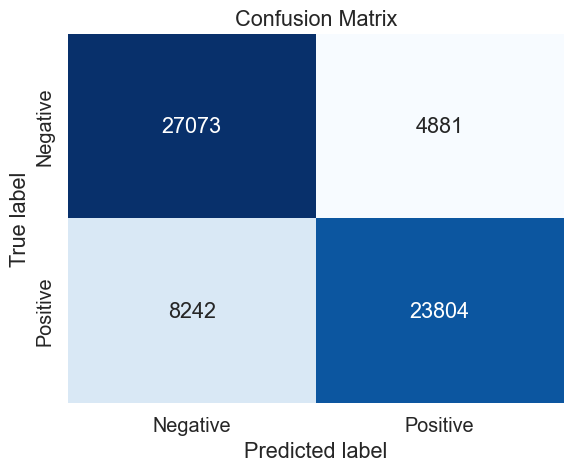

In [73]:
# Define the train and test sets (320 000 observations)
data = emote_320
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=37)

# Define the parameters to tune
parameters_mnb = {
    'vect__max_df': (.05,.1,.15),
    'vect__ngram_range': ((1, 2), (1, 3)),  
    'model__alpha': (.8,.9,1),
    #'model__penalty': ('l2','elasticnet'),
}

# Perform the grid search
gs = GridSearch_(X_train, y_train, parameters = parameters_mnb, model = MultinomialNB())

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

mnb_320_cv_results = make_results('mnb', '320', gs, 'accuracy')
results = pd.concat([results, mnb_320_cv_results], axis=0)

Performing grid search...

Data length:  1023144
Pipeline: CountVectorizer() TfidfTransformer() MultinomialNB()

Parameters:
{'model__alpha': (0.8,),
 'vect__max_df': (0.05,),
 'vect__ngram_range': ((1, 3),)}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Duration: 543.4s (n_jobs: -1)

Best score: 0.810
Best parameters set:
	model__alpha: 0.8
	vect__max_df: 0.05
	vect__ngram_range: (1, 3)


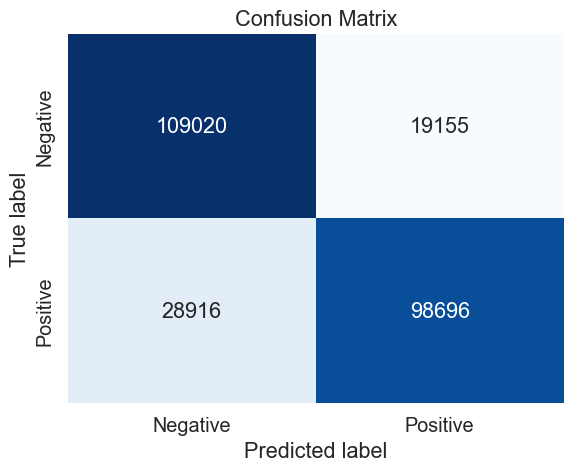

In [74]:
######################################### Final hypertuned model #########################################

# Define the train and test sets (all observations)
data = emote
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=42)

# Define the parameters to tune
best_parameters_mnb = {
    'vect__max_df': (0.05,),
    'vect__ngram_range': ((1,3),),  
    'model__alpha': (0.8,),
}

# Perform the grid search
gs = GridSearch_(X_train, y_train, parameters = best_parameters_mnb, model = MultinomialNB())

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

mnb_cv_results = make_results('mnb', 'all', gs, 'accuracy')
results = pd.concat([results, mnb_cv_results], axis=0)

In [ ]:
results.to_csv('Models Results/mnb_res.csv')

# IV. Results

Here is a benchmark of all the models accuracy performance:

In [7]:
data = {'model': ['log', 'log', 'log', 'log', 'mnb', 'mnb', 'mnb', 'mnb', 'svm', 'svm', 'svm', 'svm'], 
        'size': ['50', '100', '320', 'all', '50', '100', '320', 'all', '50', '100', '320', 'all'], 
        'accuracy':[0.770, 0.785, 0.803, 0.821, 0.763, 0.778, 0.792, 0.810, 0.780, 0.794, 0.811, 0.828]}
results_ = pd.DataFrame.from_dict(data)

<Figure size 500x500 with 0 Axes>

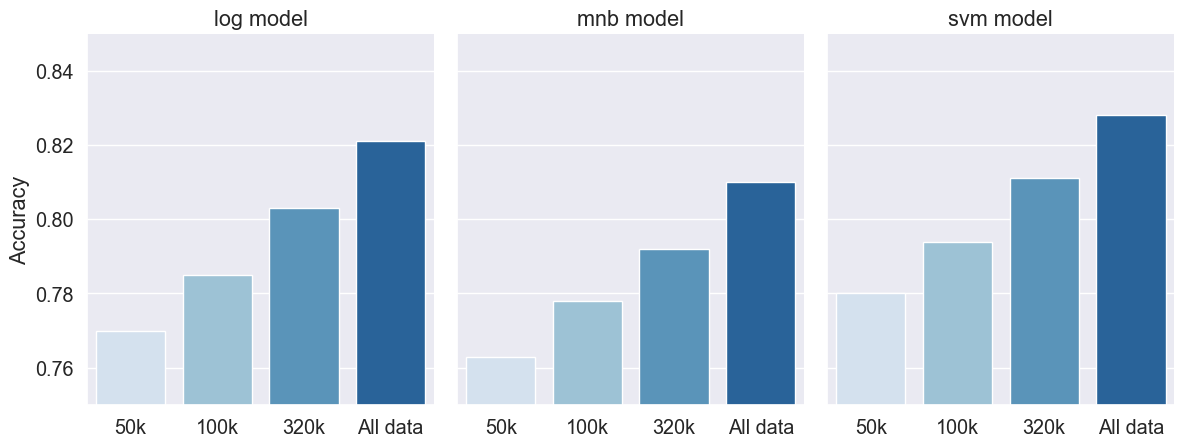

In [45]:
plt.figure(figsize=(5, 5))
g = sns.catplot(x='size',
                y='accuracy',
                col='model',
                data=results_,
                kind='bar',
                palette="Blues",
                height=5,
                aspect=.8)
g.set_axis_labels("", "Accuracy")
g.set_xticklabels(["50k", "100k", "320k", 'All data'])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0.75, 0.85));